# Continuum of IRAS16293B

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import warnings
import sys
from data_list import data_dict

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.coordinates import SkyCoord
import astropy.constants as const
au = const.au.cgs.value
pc = const.pc.cgs.value

In [5]:
def crop_image(image, center, width_au, au_per_pix):
    width = int(width_au/au_per_pix)
    return image[center[1]-width//2:center[1]+width//2, center[0]-width//2:center[0]+width//2]

def rotate_image(image, posang):
    image = ndimage.rotate(image, posang, reshape=False, axes=(1, 0))
    image = np.nan_to_num(image, nan=0)
    return image

def radial_intensity(image_array, center, width):
  if center is None:
    peak_idx_x, peak_idx_y = np.unravel_index(np.argmax(image_array, axis=None), image_array.shape)
    center = peak_idx_y
  if width != 1:
    radial_profile = np.mean(image_array[:, center-width//2:center+width//2], axis=1)
  else:
    radial_profile = image_array[:, center]
  return radial_profile

In [6]:
distance_pc = 140
crop_sizeau = 100

In [7]:
fits_data = data_dict["3mm_alma"]
with fits.open(fits_data["fname"]) as hdul:
    data = hdul[0].data
    header = hdul[0].header
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        wcs = WCS(header=header)

In [8]:
au_per_pix_edisk = abs(header['CDELT1'])/180*np.pi*distance_pc*pc/au

In [9]:
conti_img = crop_image(data, [1937, 2367], crop_sizeau, au_per_pix_edisk)

In [10]:
conti_img = np.where(conti_img > 5*1.3e-5, conti_img, np.nan)

In [11]:
print(conti_img.shape)

(118, 118)


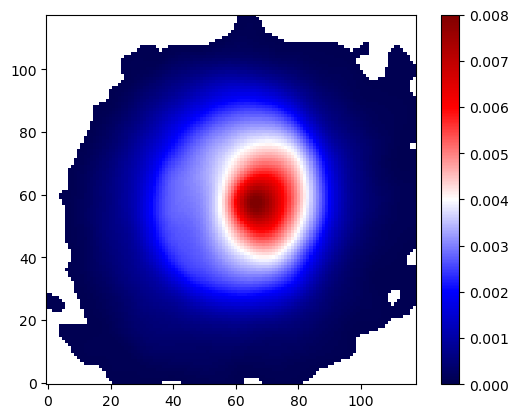

In [12]:
plt.imshow(conti_img, origin='lower', cmap='seismic', vmin=0, vmax=0.008)
plt.colorbar()
plt.savefig('iras16293_3mm_conti.pdf', transparent=True)
plt.show()

In [13]:
np.savez("3mm_alma.npz", conti_img=conti_img, au_per_pix_edisk=au_per_pix_edisk, distance_pc = distance_pc, crop_sizeau = crop_sizeau)